In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking/hotel_booking.csv


In [2]:
# this project performs analysis based off the question hypothesis for hotel booking
# importing nessecary libraries
import pandas as pd    ## to handle data
import matplotlib.pyplot as plt    
import seaborn as sns
import warnings ##to remove not important "warning" messages
warnings.filterwarnings('ignore')


In [3]:
# loading dataset 
df = pd.read_csv('/kaggle/input/hotel-booking/hotel_booking.csv')

In [4]:
# exploratory data analysis and data cleaning (performing EDA)
df.head() ## to see what data looks like (just top 5 rows)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.tail(3) ## to see how last 3 rows (5 is default value if no #)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [6]:
df.shape ## to see num of rows/cols in data set

(119390, 36)

In [7]:
df.columns ## to see columns/headings in data set
# future comment: only focus on columns related to problem set

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [8]:
#checking datatypes of columns ,, less num = missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#converting to "date-time" for r_s_d column since in object form
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])



In [10]:
#rechecking r_s_d datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
# checking how many object dataypes (# of categories present)
df.describe(include = 'object')
# i.e in "unique" row, theres two types of hotels, 177 countries etc

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [12]:
# seeing what the object types are (the categories)
for col in df.describe(include = 'object').columns: ## goes thru all cols in data (from last line)
    print(col)
    print(df[col].unique()) ## prints all categories in cols
    print('-'*50) ## fancyyyyy lol j to make reading cols easier with lines

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [13]:
# checking missing values
# returns name of column thru 'isnull', 'sum' adds up all missing
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
# removing 'agent' & 'company' column b/c big unnessecary data for problem statement
df.drop(['company', 'agent'], axis = 1, inplace = True) ## axis=1 b/c column, inplace=true to make change
df.dropna(inplace = True) ## to remove rows w/ missing val

In [15]:
#rechecking
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
# cleaning data (checking for outliers)

In [17]:
## seeing summary stats of numerical cols
df.describe()
## there's many outliers i.e bringing 10 children .. leaving minor outlier in just because

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [18]:
## removing outrageous outliers to clean data
df = df[df['adr']<5000]

In [19]:
# time for data analysis and visualizations RAAAWHHHHH

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


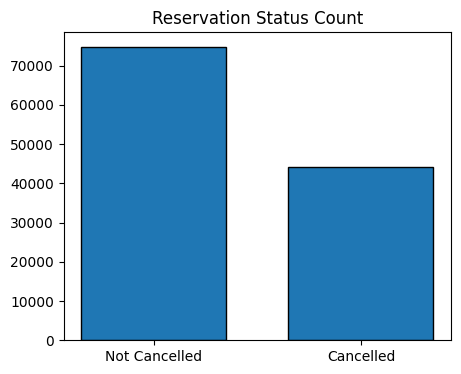

In [20]:
# seeing amount of reservations cancelled and not
cancelled_perc = df['is_canceled'].value_counts(normalize = True) ## seeing percent of canellation at hotels, 'normalize=true' gives %
print(cancelled_perc)

#visualizing as bar graph
plt.figure(figsize = (5,4)) ##size of graph
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7) ## 'edgecolour' 'width' to make it look pretty not imp
plt.show() 

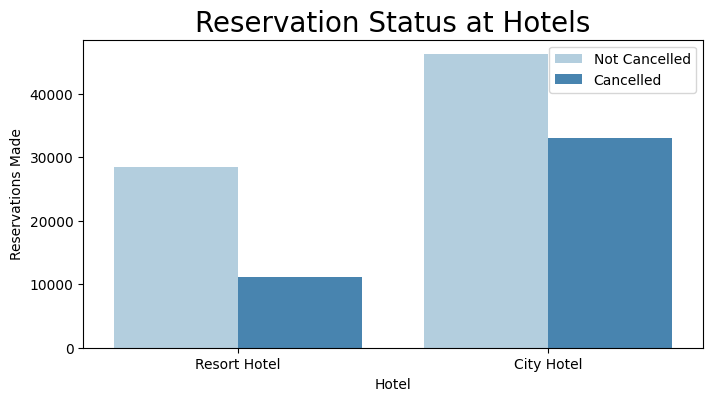

In [21]:
#seeing depending on hotel.. which hotel has higher ratio
# using count plot
plt.figure(figsize = (8,4)) #setting up size of figure

#using seaborn libraries where x-axis has hotel names, is_cancelled is category, data is from df
ax1 = sns.countplot(x = 'hotel', hue = "is_canceled", data = df, palette = 'Blues')

#to make plot look pretty pretty and organized
legend_labels,_ = ax1.get_legend_handles_labels() ##retrieves the handles and labels used in the legend of a plot
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status at Hotels', size = 20)
plt.xlabel('Hotel')
plt.ylabel('Reservations Made')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

In [22]:
# we see city hotels have higher cancelations.. price & maintence can be a reason why .. will show by average daily rate (adr)
# seeing percent of cancellations per hotel type 
# filtering data for resort hotels
resort_hotel = df[df['hotel'] == 'Resort Hotel'] ## in hotel column filter for resort
resort_hotel['is_canceled'].value_counts(normalize = True) ## counts how many cancelled and gives in percent form

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [23]:
# like last line filtering for city hotels
city_hotel = df[df['hotel'] == 'City Hotel'] ## in hotel column filter for city
city_hotel['is_canceled'].value_counts(normalize = True)
# city has 40% of cancellations which is pre high

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [24]:
# seeing if price is a factor for the higher cancelations at city hotels
# using 'groupby' to group to find adr of cancelation of reservations using mean
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [25]:
### NEED TO FIGURE OUT WHY RESORT HOTEL NOT SHOWING ABOVE :(((())))

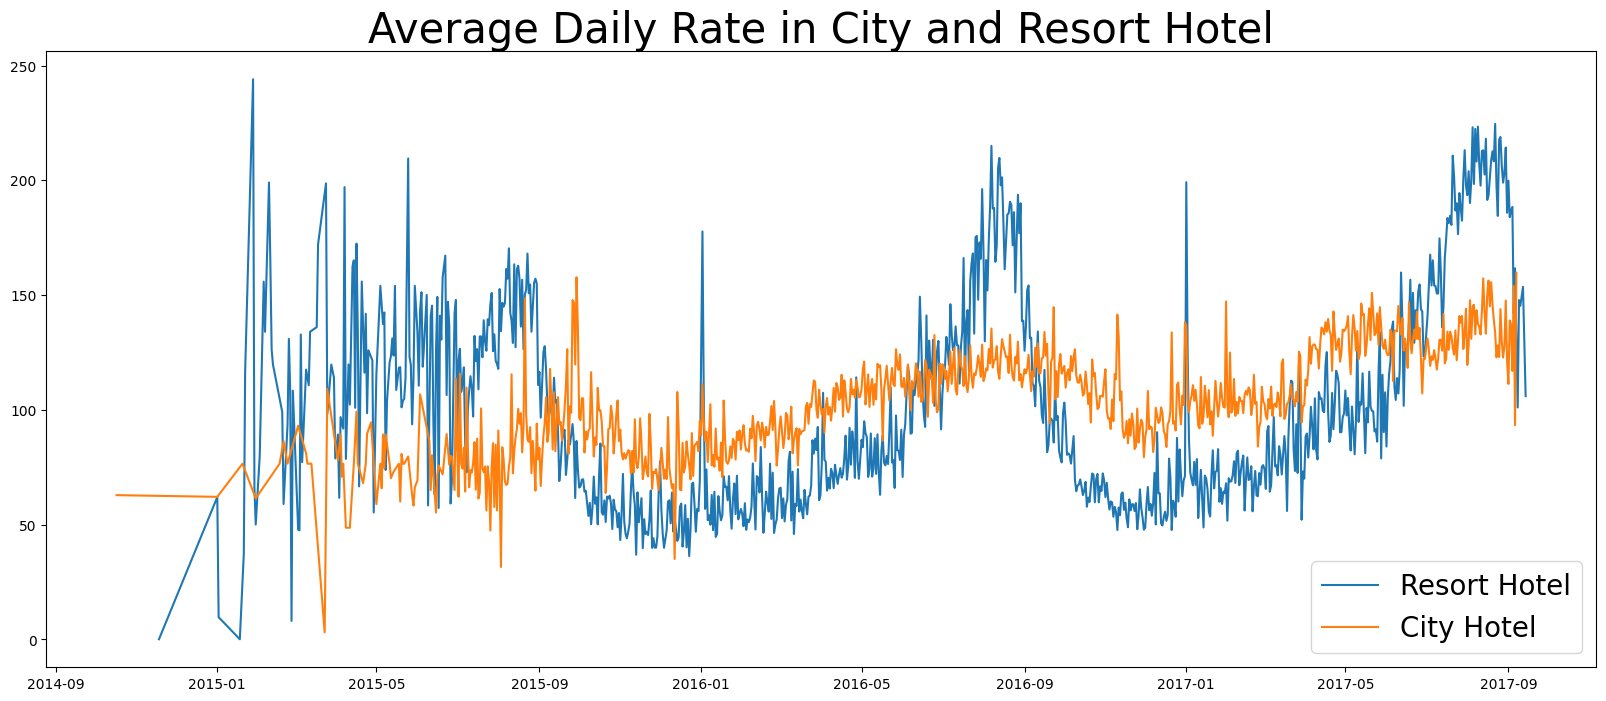

In [26]:
#visualization of adr of resort and city to compare if prices is a factor
plt.figure(figsize = (20,8)) ##size of figure
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
# x value is index (reservation day) and y value is adr
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()



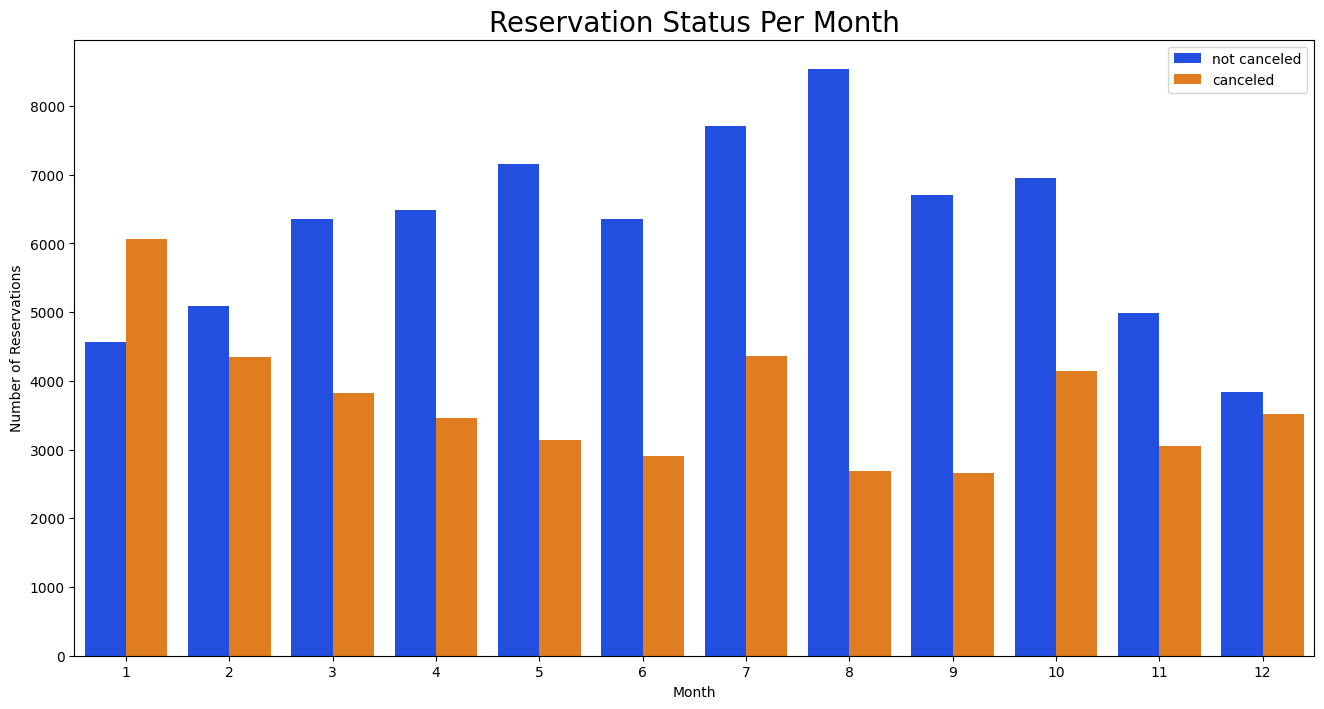

In [27]:
# checking which month has more/less cancelations

#first creating a column for month since we dont have only full dates
df['month'] = df['reservation_status_date'].dt.month 
plt.figure(figsize = (16,8))
# x axis will have month, hue is basis for grouping which is 'is_cancelled', data comes from df, 
ax1 = sns.countplot(x='month', hue = 'is_canceled', data=df, palette = 'bright') 
legend_labels,_ = ax1.get_legend_handles_labels() #getting legends
#visualizing :)
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

In [28]:
#january has highest cancelation and august has lowest
#jan/dec has lowest reservations and august has highest 
# this may be due to prices for these months so lets plot the adr of the months 
# this will check if price has a correlation with cancelation

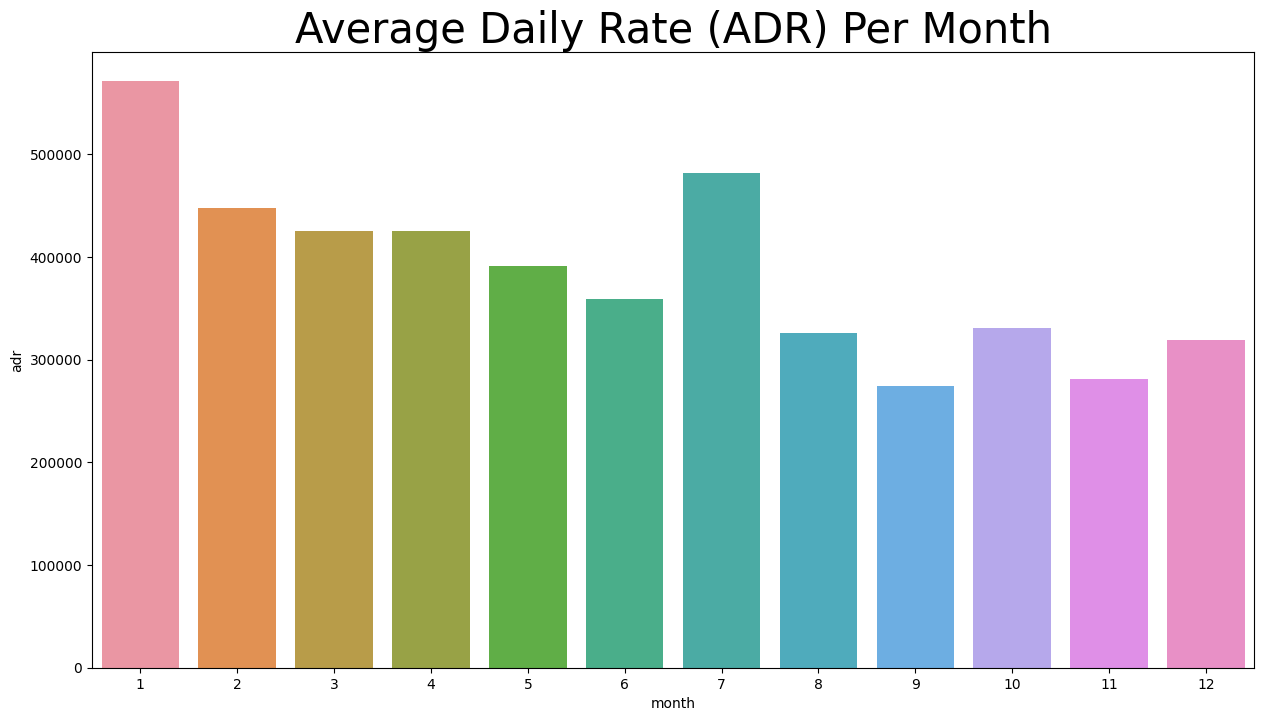

In [29]:
#will only show cancelled data since need to see price/cancelation correlation
#note is_cancelled == 1 b/c when 1 that means cancelaton, 0 is reservation
#then we group by month using 'groupby' function
#[['adr']].sum() ... finds sum so total ADR of that months booking
data=df[df['is_canceled']== 1].groupby('month')[['adr']].sum().reset_index()

#visualizinggggg

plt.figure(figsize = (15,8)) 
plt.title('Average Daily Rate (ADR) Per Month', fontsize = 30)
sns.barplot(x='month', y= 'adr', data=data)
plt.show()



In [30]:
# from graph, jan has highest price hence highest cancelation proving our hypothesis true
# even tho august is not the lowest price, from our previous graph we saw it has least cancelations
# september has lowest price
# this may be because september is back to school season 
# so august has lowest since many can go on vacation while prices are still moderatly low
# hence and price and correlation do have correlation

In [31]:
# lets compare cancelation by country and see if correlation
# only checking top 10 countries (since 177 countries is big data set)

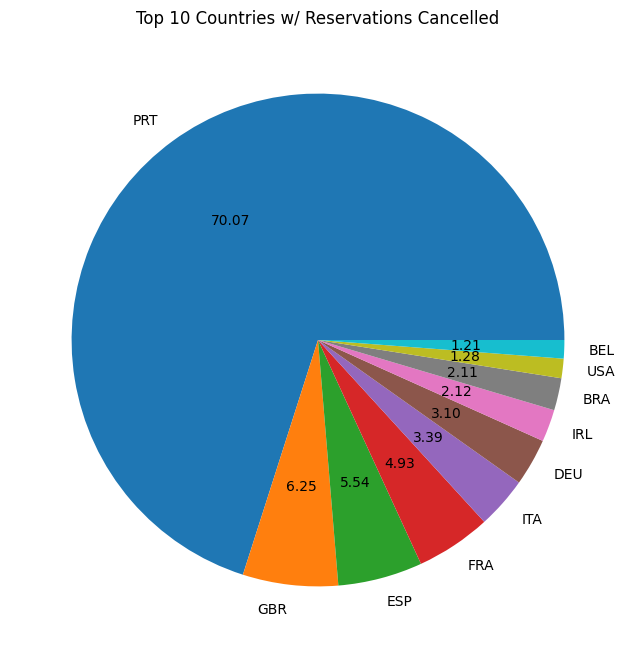

In [32]:
cancelled_data = df[df['is_canceled'] == 1] ##filtered data to only keep canceled reservations
top_10_country = cancelled_data['country'].value_counts()[:10] ##finds top 10 countries w/ most cancellations in decending order

# visualizinggggggg

plt.figure(figsize = (8,8))
plt.title("Top 10 Countries w/ Reservations Cancelled")
# to only show upto 2 decimal using 'autopct'
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [33]:
# Portugal has highest at 70%
# would advise portugal to improves facilities, prices, advertising to decrease cancelations



In [34]:
# lastly lets see where clients are coming from to make reservations (i.e direct, agents, etc)
df['market_segment'].value_counts() ## counting val to see where customers are coming from


market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [35]:
# we see top coming from online travel agent
# seeing percent count of the above
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [36]:
#seeing where cancellations are coming from in percents
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

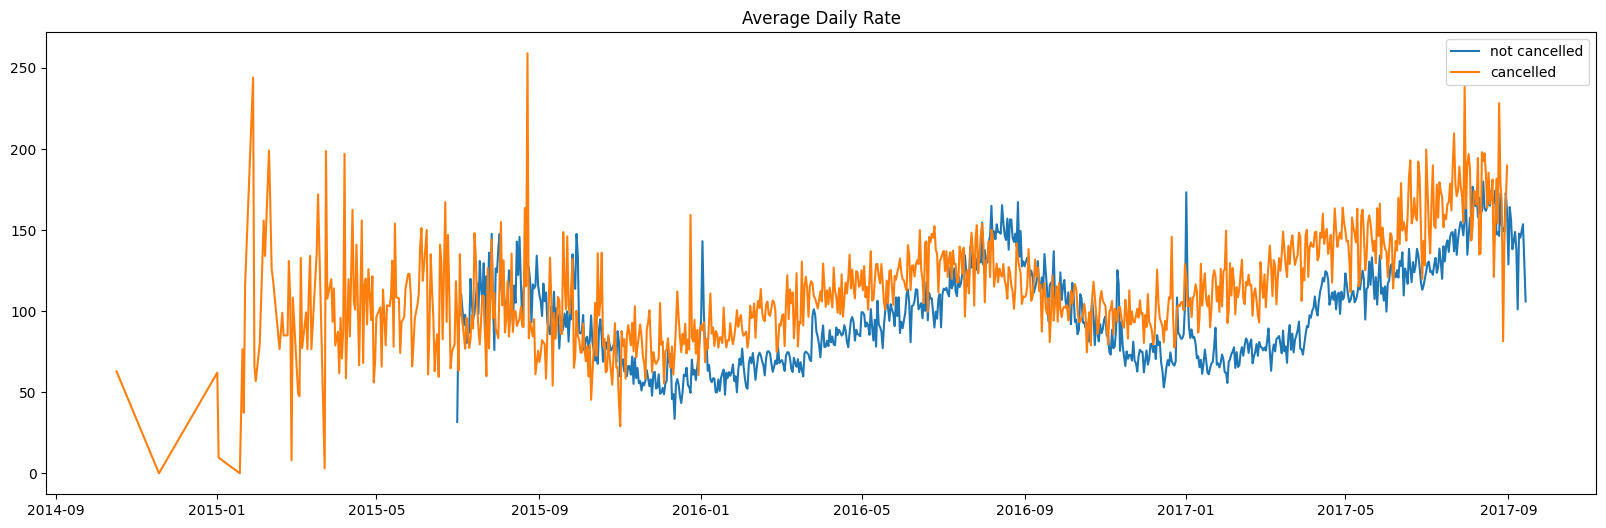

In [37]:
# we see online has most cancelation possibly due to catfishing of hotels and not being able to check it out in person
# lets see adr 

cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean() #groups by date and find mean of adr
cancelled_df_adr.reset_index(inplace = True) #
cancelled_df_adr.sort_values('reservation_status_date', inplace = True) #sorts rows(adr) by date (for proper time series line chart) in descending order

#doing same for no cancelations made as above; group by date, get average adr, reset index, sort by date
not_cancelled_data = df[df['is_canceled'] == 0] ##filters data to get only bookings that were not canceled
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)


# visualizinggggggg! 

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled') #plot ADR over time for non-canceled bookings
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

In [38]:
# data looks messy
# we see that data is missing near 2015, only consistency near 2016-2017 years
# hence filter data 

In [39]:
# filtering to have data between 2016 to september 2017
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

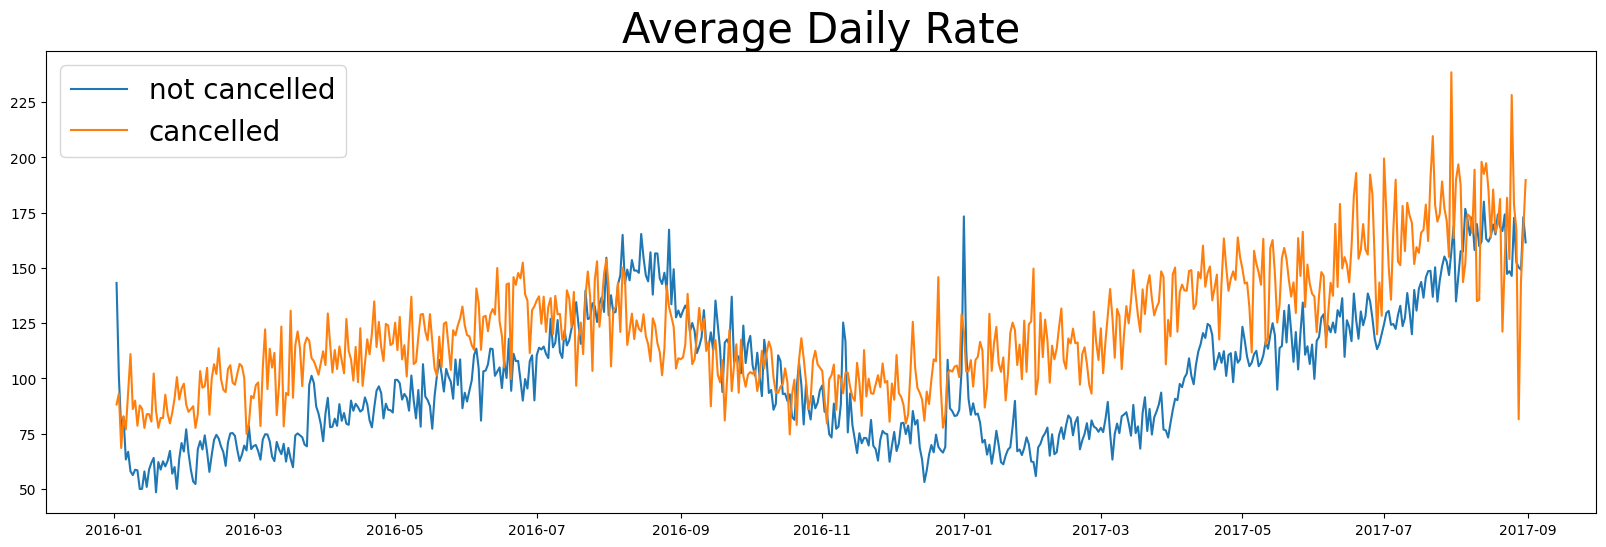

In [40]:
# visualizing filtered data w/o missing data for accuracy :)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

In [41]:
# the above graph is more clear and provides a bit more accurate information as missing data may skew output
# we see as adr is higher then so is cancelation so there is some correlation between these two also


In [42]:
# this little side project of mine answer some of my questions
# we collected data, cleaned it and performed analysis on it to answer our questions :)